In [1]:
pip install scipy statsmodels arch scikit-learn numpy pandas matplotlib seaborn


In [2]:
from arch import arch_model
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

pd.options.display.float_format = '{:.4f}'.format


df1 = pd.read_csv(../Clean Data/US_Cleaned.csv")
df2 = pd.read_csv(../Clean Data/EU_Cleaned.csv")
df3 = pd.read_csv(../Clean Data/IN_Cleaned.csv")
df1['Log_Returns'] = np.log(df1['PX_LAST'] / df1['PX_LAST'].shift(1))
df1 = df1.dropna()
df2['Log_Returns'] = np.log(df2['PX_LAST'] / df2['PX_LAST'].shift(1))
df2 = df2.dropna()
df3['Log_Returns'] = np.log(df3['PX_LAST'] / df3['PX_LAST'].shift(1))
df3 = df3.dropna()

model = arch_model(
    df1['Log_Returns'],
    vol='Garch',
    p=1,
    q=1,
    dist='normal',
    rescale=False,
    x=df1[['PX_VOLUME_x']]
    )
model_fit = model.fit(disp="off")
df1['GARCH_Volatility_US'] = model_fit.conditional_volatility
residuals1 = model_fit.resid

model = arch_model(
    df2['Log_Returns'],
    vol='Garch',
    p=1,
    q=1,
    dist='normal',
    rescale=False,
    x=df2[['PX_VOLUME_x']]
    )
model_fit = model.fit(disp="off")
df2['GARCH_Volatility_EU'] = model_fit.conditional_volatility
residuals2 = model_fit.resid

model = arch_model(
    df3['Log_Returns'],
    vol='Garch',
    p=1,
    q=1,
    dist='normal',
    rescale=False,
    x=df3[['PX_VOLUME_x']]
    )
model_fit = model.fit(disp="off")
df3['GARCH_Volatility_IN'] = model_fit.conditional_volatility
residuals3 = model_fit.resid



df1['Sigma_Annualized_US'] = df1['GARCH_Volatility_US'] * np.sqrt(252)
df2['Sigma_Annualized_EU'] = df2['GARCH_Volatility_EU'] * np.sqrt(252)
df3['Sigma_Annualized_IN'] = df3['GARCH_Volatility_IN'] * np.sqrt(252)


t_stat1, p_value1 = ttest_rel(df1['Sigma_Annualized_US'], df1['VIX'])
t_stat2, p_value2 = ttest_rel(df2['Sigma_Annualized_EU'], df2['VSTOXX'])
t_stat3, p_value3 = ttest_rel(df3['Sigma_Annualized_IN'], df3['NIFVIX'])

sample1 = len(df1['Date'])
sample2 = len(df2['Date'])
sample3 = len(df3['Date'])
df_us = sample1 - 1
df_eu = sample2 - 1
df_in = sample3 - 1

mean1Garch = df1['Sigma_Annualized_US'].mean()
mean2Garch = df2['Sigma_Annualized_EU'].mean()
mean3Garch = df3['Sigma_Annualized_IN'].mean()
mean1VI = df1['VIX'].mean()
mean2VI = df2['VSTOXX'].mean()
mean3VI = df3['NIFVIX'].mean()

sd1Garch = df1['Sigma_Annualized_US'].std()
sd2Garch = df2['Sigma_Annualized_EU'].std()
sd3Garch = df3['Sigma_Annualized_IN'].std()
sd1VI = df1['VIX'].std()
sd2VI = df2['VSTOXX'].std()
sd3VI = df3['NIFVIX'].std()



t_test = {
    "Metric": [
        "Sample",
        "df",
        "Mean GARCH",
        "Standard Deviation GARCH",
        "Mean VI",
        "Standard Deviation VI",
        "Paired T-Test (t-statistic)",
        "Paired T-Test (p-value)",
        "Alpha",
        "Null Hypothesis",
    ],
    "USA": [
        sample1,
        df_us,
        mean1Garch,
        sd1Garch,
        mean1VI,
        sd1VI,
        t_stat1,
        "<0.001" if p_value1 < 0.001 else p_value1,
        0.025,
        "Reject" if p_value1 < 0.025 else "Fail to reject"
    ],
    "Europe": [
        sample2,
        df_eu,
        mean2Garch,
        sd2Garch,
        mean2VI,
        sd2VI,
        t_stat2,
        "<0.001" if p_value2 < 0.001 else p_value2,
        0.025,
        "Reject" if p_value2 < 0.025 else "Fail to reject"
    ],
    "India": [
        sample3,
        df_in,
        mean3Garch,
        sd3Garch,
        mean3VI,
        sd3VI,
        t_stat3,
        "<0.001" if p_value3 < 0.001 else p_value3,
        0.025,
        "Reject" if p_value3 < 0.025 else "Fail to reject"
    ],
}

t_test_df = pd.DataFrame(t_test)
print(t_test_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	USA	Europe	India
Sample	1100	1147	1086
df	1099	1146	1085
Mean GARCH	0.1673169635855927	0.17478623577278338	0.1499047638864767
Standard Deviation GARCH	0.059023958515478724	0.05932972552823229	0.050518470577341885
Mean VI	0.21008645454545452	0.21681358761987793	0.17927571362799266
Standard Deviation VI	0.06379480019209513	0.0653105526900159	0.06294417150040783
Paired T-Test (t-statistic)	-28.05405717652074	-28.13734861111413	-18.936129557267773
Paired T-Test (p-value)	<0.001	<0.001	<0.001
Alpha	0.025	0.025	0.025
Null Hypothesis	Reject	Reject	Reject



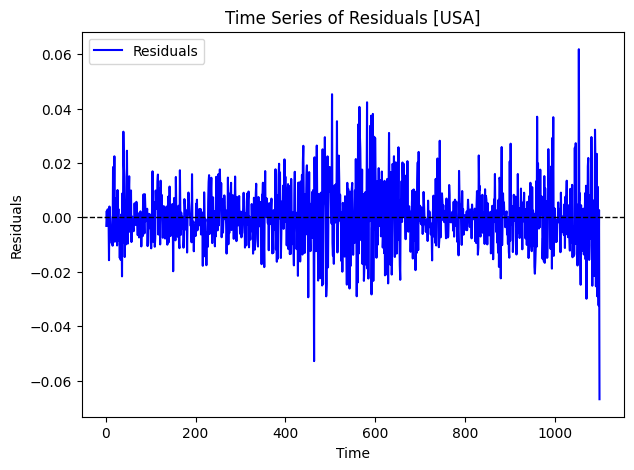

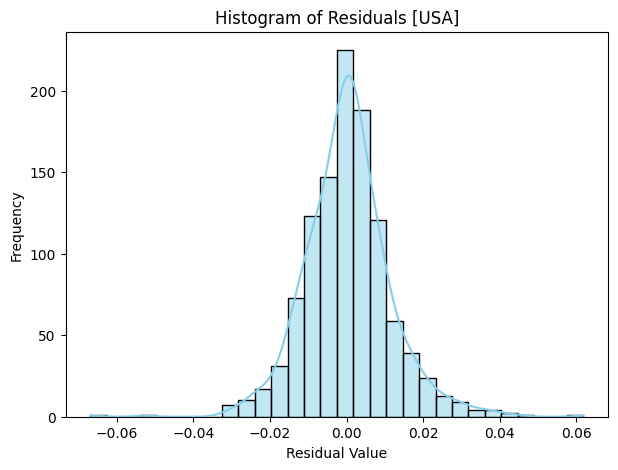

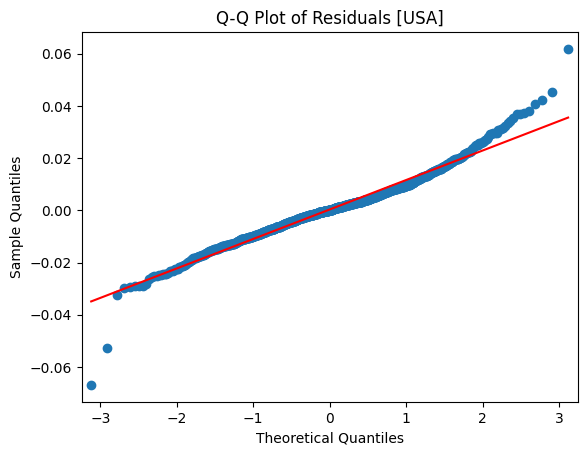

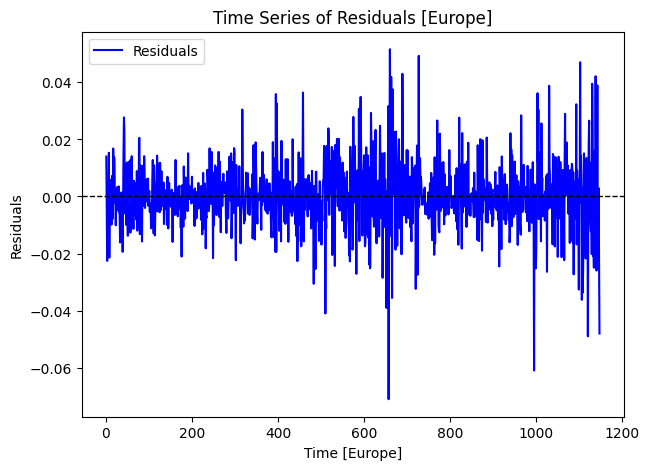

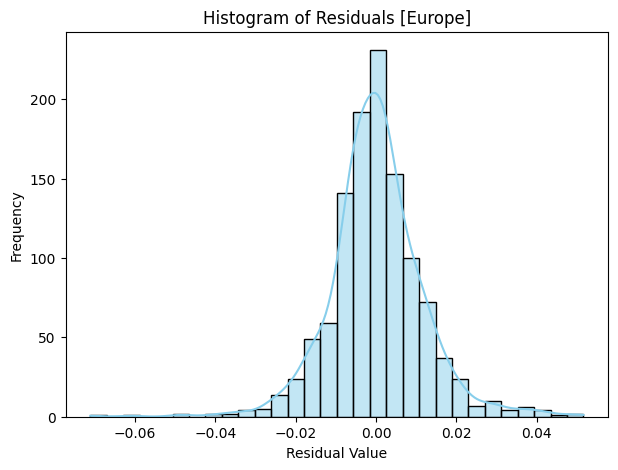

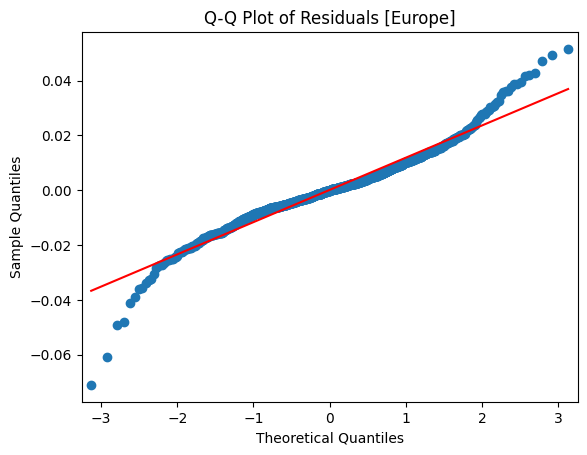

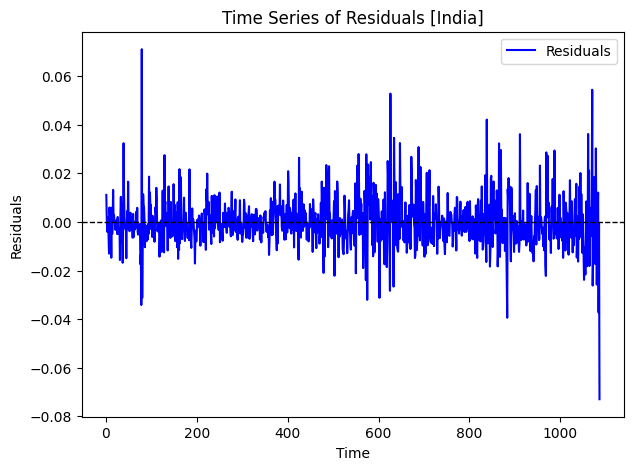

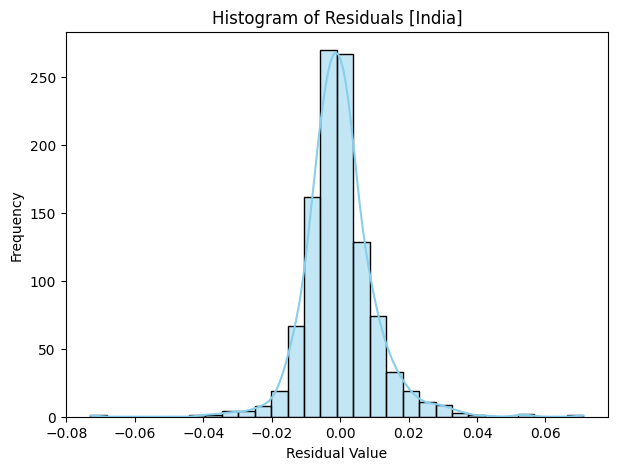

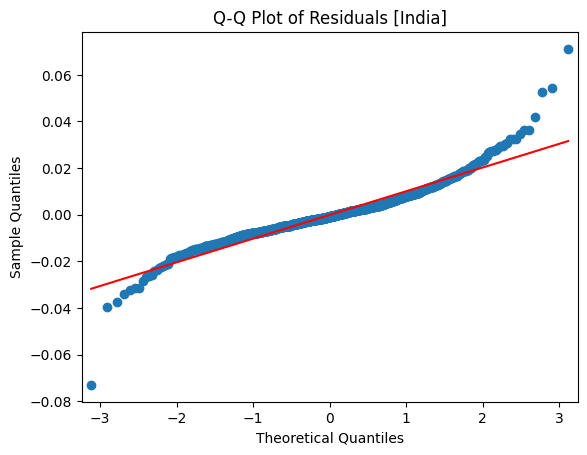

In [3]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# US
plt.figure(figsize=(7, 5))
plt.plot(residuals1, label='Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Time Series of Residuals [USA]')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(residuals1, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Residuals [USA]')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

sm.qqplot(residuals1, line='s')
plt.title('Q-Q Plot of Residuals [USA]')
plt.show()


# EU
plt.figure(figsize=(7, 5))
plt.plot(residuals2, label='Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Time Series of Residuals [Europe]')
plt.xlabel('Time [Europe]')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(residuals2, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Residuals [Europe]')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

sm.qqplot(residuals2, line='s')
plt.title('Q-Q Plot of Residuals [Europe]')
plt.show()


# IN
plt.figure(figsize=(7, 5))
plt.plot(residuals3, label='Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Time Series of Residuals [India]')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(residuals3, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Residuals [India]')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

sm.qqplot(residuals3, line='s')
plt.title('Q-Q Plot of Residuals [India]')
plt.show()


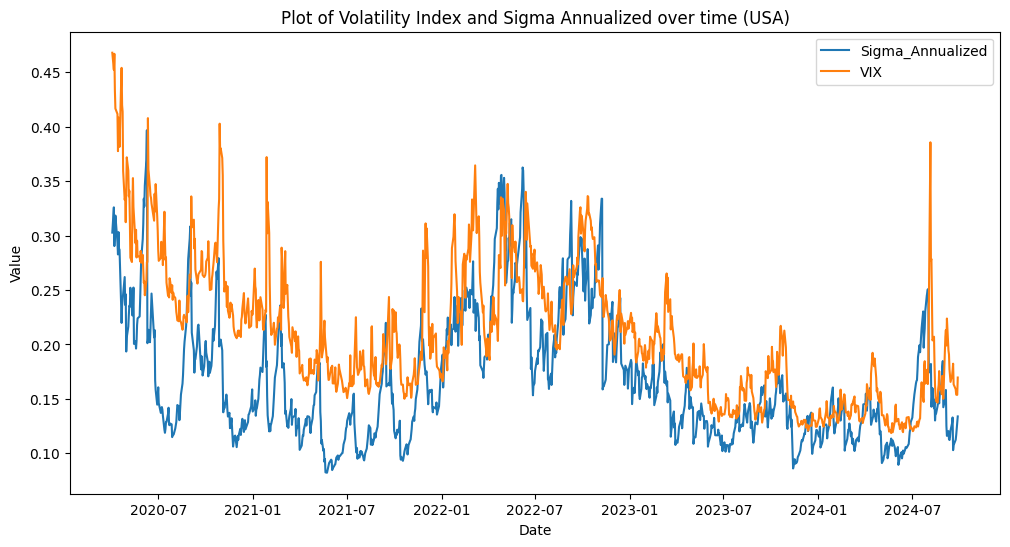

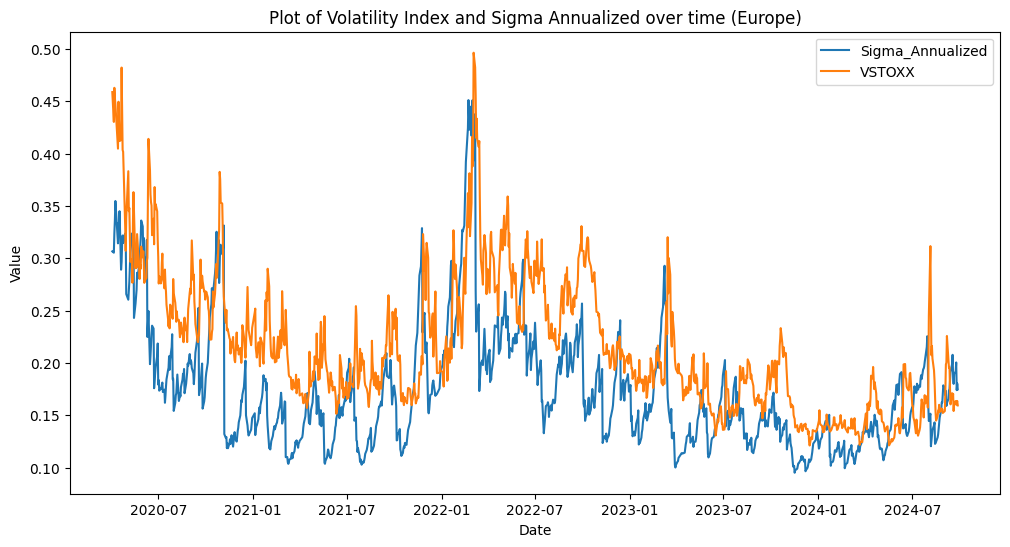

<ipython-input-4-ca7f3062267e>:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['Date'] = pd.to_datetime(df3['Date'])


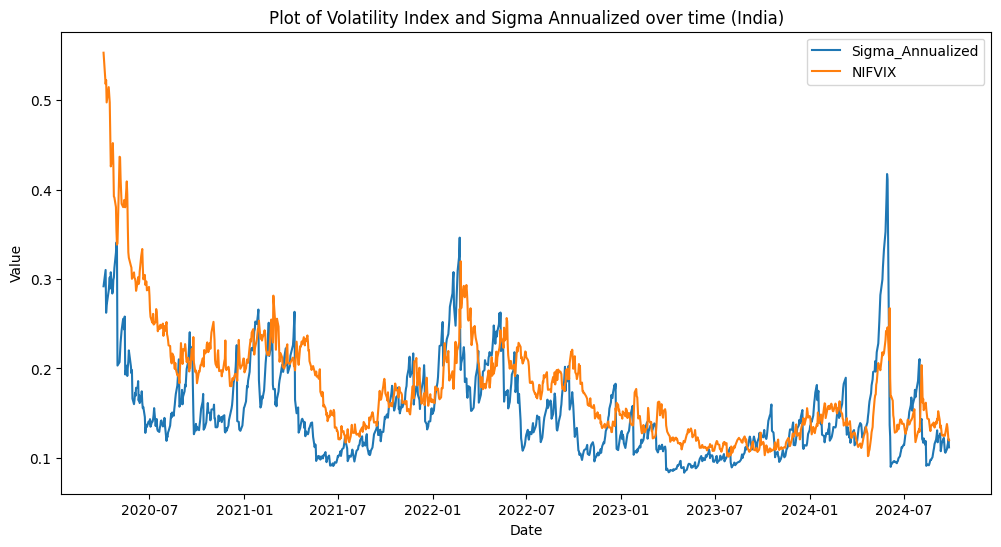

In [4]:
plt.figure(figsize=(12, 6))
df1['Date'] = pd.to_datetime(df1['Date'])
plt.plot('Date', 'Sigma_Annualized_US', data=df1)
plt.plot('Date', 'VIX', data=df1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Volatility Index and Sigma Annualized over time (USA)')
plt.legend(['Sigma_Annualized', 'VIX'])
plt.show()

plt.figure(figsize=(12, 6))
df2['Date'] = pd.to_datetime(df2['Date'])
plt.plot('Date', 'Sigma_Annualized_EU', data=df2)
plt.plot('Date', 'VSTOXX', data=df2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Volatility Index and Sigma Annualized over time (Europe)')
plt.legend(['Sigma_Annualized', 'VSTOXX'])
plt.show()

plt.figure(figsize=(12, 6))
df3['Date'] = pd.to_datetime(df3['Date'])
plt.plot('Date', 'Sigma_Annualized_IN', data=df3)
plt.plot('Date', 'NIFVIX', data=df3)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Volatility Index and Sigma Annualized over time (India)')
plt.legend(['Sigma_Annualized', 'NIFVIX'])
plt.show()

Metric	USA	Europe	India
Pearson Correlation	0.6635332243033989	0.6744169356400427	0.6134613232498365
Significance (p-value)	<0.001	<0.001	<0.001
Best Lag	-4	-4	0
Maximum Correlation at Best Lag	0.7002910428963955	0.7178567699141951	0.6134613232498367



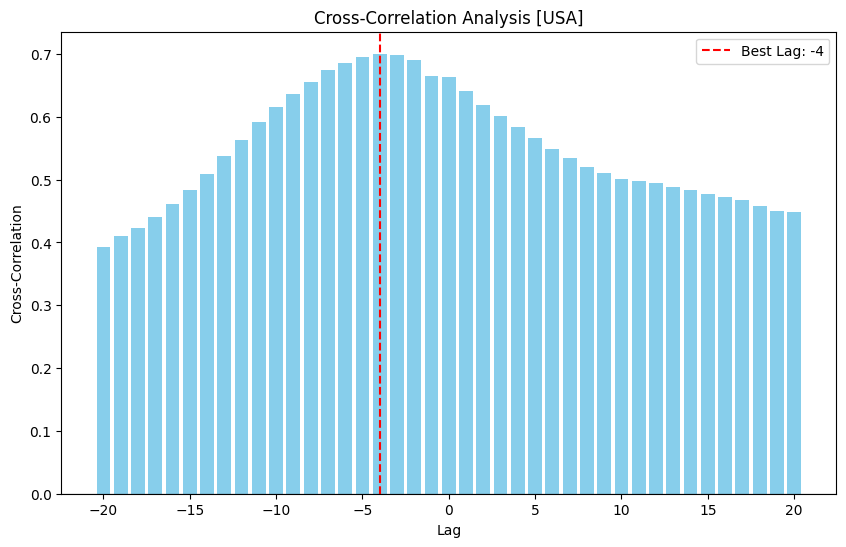

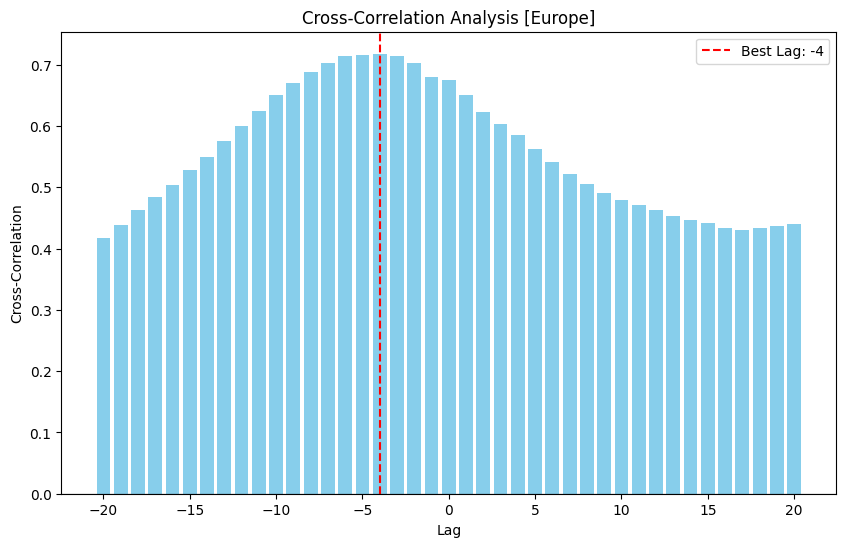

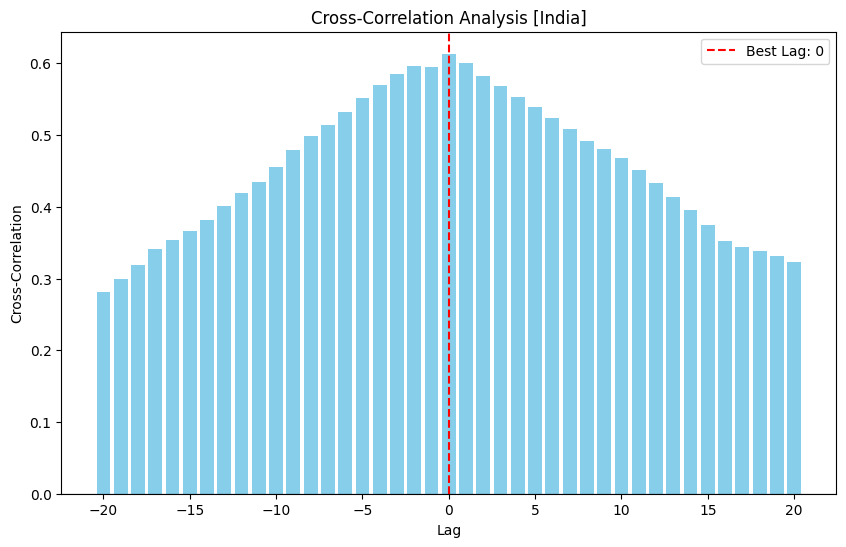

In [5]:
from scipy.stats import pearsonr
correlation_us, p_value_us = pearsonr(df1["VIX"], df1["Sigma_Annualized_US"])
correlation_eu, p_value_eu = pearsonr(df2["VSTOXX"], df2["Sigma_Annualized_EU"])
correlation_in, p_value_in = pearsonr(df3["NIFVIX"], df3["Sigma_Annualized_IN"])

def cross_correlation(series1, series2, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    correlations = [np.corrcoef(series1, series2.shift(lag).fillna(0))[0, 1] for lag in lags]
    return lags, correlations

max_lag = 20
lags1, correlations1 = cross_correlation(df1["VIX"], df1["Sigma_Annualized_US"], max_lag)
lags2, correlations2 = cross_correlation(df2["VSTOXX"], df2["Sigma_Annualized_EU"], max_lag)
lags3, correlations3 = cross_correlation(df3["NIFVIX"], df3["Sigma_Annualized_IN"], max_lag)

# Find the lag with maximum correlation
max_corr_idx1 = np.argmax(np.abs(correlations1))
best_lag1 = lags1[max_corr_idx1]
best_correlation1 = correlations1[max_corr_idx1]

max_corr_idx2 = np.argmax(np.abs(correlations2))
best_lag2 = lags2[max_corr_idx2]
best_correlation2 = correlations2[max_corr_idx2]

max_corr_idx3 = np.argmax(np.abs(correlations3))
best_lag3 = lags3[max_corr_idx3]
best_correlation3 = correlations3[max_corr_idx3]

Cross_correlations = {
    "Metric": [
        "Pearson Correlation",
        "Significance (p-value)",
        "Best Lag",
        "Maximum Correlation at Best Lag"
    ],
    "USA": [
        correlation_us,
        "<0.001" if p_value_us<0.001 else p_value_us,
        best_lag1,
        best_correlation1
    ],
    "Europe": [
        correlation_eu,
        "<0.001" if p_value_eu<0.001 else p_value_eu,
        best_lag2,
        best_correlation2
    ],
    "India": [
        correlation_in,
        "<0.001" if p_value_in<0.001 else p_value_in,
        best_lag3,
        best_correlation3
    ],
}

cross_correlations_df = pd.DataFrame(Cross_correlations)

print(cross_correlations_df.to_csv(sep='\t', index=False, float_format='%.4f'))

# Plot Cross-Correlation
plt.figure(figsize=(10, 6))
plt.bar(lags1, correlations1, color="skyblue")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(best_lag1, color="red", linestyle="--", label=f"Best Lag: {best_lag1}")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Analysis [USA]")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(lags2, correlations2, color="skyblue")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(best_lag2, color="red", linestyle="--", label=f"Best Lag: {best_lag2}")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Analysis [Europe]")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(lags3, correlations3, color="skyblue")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(best_lag3, color="red", linestyle="--", label=f"Best Lag: {best_lag3}")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Analysis [India]")
plt.legend()
plt.show()

In [6]:
from scipy.stats import levene, bartlett
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import ks_2samp

dw_stat1 = durbin_watson(residuals1)
rmse1 = mean_squared_error(df1['VIX'], df1['Sigma_Annualized_US'], squared=False)
mae1 = mean_absolute_error(df1['VIX'], df1['Sigma_Annualized_US'])
levene_stat1, levene_p_value1 = levene(df1['Sigma_Annualized_US'], df1['VIX'])
bartlett_stat1, bartlett_p_value1 = bartlett(df1['Sigma_Annualized_US'], df1['VIX'])
mean_volatility1 = df1['VIX'].mean()
ks_stat1, ks_p_value1 = ks_2samp(df1['VIX'], df1['Sigma_Annualized_US'])

dw_stat2 = durbin_watson(residuals2)
rmse2 = mean_squared_error(df2['VSTOXX'], df2['Sigma_Annualized_EU'], squared=False)
mae2 = mean_absolute_error(df2['VSTOXX'], df2['Sigma_Annualized_EU'])
levene_stat2, levene_p_value2 = levene(df2['Sigma_Annualized_EU'], df2['VSTOXX'])
bartlett_stat2, bartlett_p_value2 = bartlett(df2['Sigma_Annualized_EU'], df2['VSTOXX'])
mean_volatility2 = df2['VSTOXX'].mean()
ks_stat2, ks_p_value2 = ks_2samp(df2['VSTOXX'], df2['Sigma_Annualized_EU'])

dw_stat3 = durbin_watson(residuals3)
rmse3 = mean_squared_error(df3['NIFVIX'], df3['Sigma_Annualized_IN'], squared=False)
mae3 = mean_absolute_error(df3['NIFVIX'], df3['Sigma_Annualized_IN'])
levene_stat3, levene_p_value3 = levene(df3['Sigma_Annualized_IN'], df3['NIFVIX'])
bartlett_stat3, bartlett_p_value3 = bartlett(df3['Sigma_Annualized_IN'], df3['NIFVIX'])
mean_volatility3 = df3['NIFVIX'].mean()
ks_stat3, ks_p_value3 = ks_2samp(df3['NIFVIX'], df3['Sigma_Annualized_IN'])

robust_test = {
    "Test": [
        "Durbin-Watson statistic",
        "Root Mean Squared Error (RMSE)",
        "Mean Absolute Error (MAE)",
        "Mean Volatility Index",
        "Levene's Test (statistic)",
        "Levene's Test (p-value)",
        "Bartlett's Test (statistic)",
        "Bartlett's Test (p-value)",
        "KS' Test (statistic)",
        "KS' Test (p-value)"
    ],
    "USA": [
       dw_stat1,
       rmse1,
       mae1,
       mean_volatility1,
       levene_stat1,
       levene_p_value1,
       bartlett_stat1,
       bartlett_p_value1,
       ks_stat1,
       "<0.001" if ks_p_value1 < 0.001 else ks_p_value1
    ],
    "Europe": [
        dw_stat2,
        rmse2,
        mae2,
        mean_volatility2,
        levene_stat2,
        levene_p_value2,
        bartlett_stat2,
        bartlett_p_value2,
        ks_stat2,
        "<0.001" if ks_p_value2 < 0.001 else ks_p_value2
    ],
    "India": [
        dw_stat3,
        rmse3,
        mae3,
        mean_volatility3,
        levene_stat3,
        levene_p_value3,
        bartlett_stat3,
        bartlett_p_value3,
        ks_stat3,
        "<0.001" if ks_p_value3 < 0.001 else ks_p_value3
    ]
}

robust_test_df = pd.DataFrame(robust_test)

print(robust_test_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Test	USA	Europe	India
Durbin-Watson statistic	2.0316862161411597	2.0490864618805156	1.9499383760673377
Root Mean Squared Error (RMSE)	0.06620834257311907	0.06574962620413231	0.05893139901240032
Mean Absolute Error (MAE)	0.05260894062262694	0.05396899998597732	0.043515554281994426
Mean Volatility Index	0.21008645454545452	0.21681358761987793	0.17927571362799266
Levene's Test (statistic)	8.038660992792414	15.085478933447714	24.727468713952
Levene's Test (p-value)	0.004620810922504444	0.00010566028250871233	7.121443213375195e-07
Bartlett's Test (statistic)	6.630115184450848	10.55022251886634	52.02911896139979
Bartlett's Test (p-value)	0.010026878041015012	0.001161741005361497	5.468365863796596e-13
KS' Test (statistic)	0.32545454545454544	0.3147340889276373	0.22099447513812154
KS' Test (p-value)	<0.001	<0.001	<0.001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
df1['Vol Diff1'] = (df1['VIX'] - df1['Sigma_Annualized_US']).abs()
STDEV1 = np.std(df1['Vol Diff1'])
Lower_Range1   = df1['Vol Diff1'].mean() - 1.645 * STDEV1
Upper_Range1  = df1['Vol Diff1'].mean() + 1.645 * STDEV1
df_95_1 = df1[(df1['Vol Diff1']<= Upper_Range1) & (df1['Vol Diff1']>= Lower_Range1)]

df2['Vol Diff2'] = (df2['VSTOXX'] - df2['Sigma_Annualized_EU']).abs()
STDEV2 = np.std(df2['Vol Diff2'])
Lower_Range2   = df2['Vol Diff2'].mean() - 1.645 * STDEV2
Upper_Range2  = df2['Vol Diff2'].mean() + 1.645 * STDEV2
df_95_2 = df2[(df2['Vol Diff2']<= Upper_Range2) & (df2['Vol Diff2']>= Lower_Range2)]

df3['Vol Diff3'] = (df3['NIFVIX'] - df3['Sigma_Annualized_IN']).abs()
STDEV3 = np.std(df3['Vol Diff3'])
Lower_Range3   = df3['Vol Diff3'].mean() - 1.645 * STDEV3
Upper_Range3  = df3['Vol Diff3'].mean() + 1.645 * STDEV3
df_95_3 = df3[(df3['Vol Diff3']<= Upper_Range3) & (df3['Vol Diff3']>= Lower_Range3)]

vol_diff = {
    "Metric": [
        "Standard Deviation",
        "Lower Range",
        "Upper Range",
        "Mean Volatility Differential",
        "Original Observations",
        "Cleaned Observations",
    ],
    "USA": [
        STDEV1,
        Lower_Range1,
        Upper_Range1,
        df1['Vol Diff1'].mean(),
        len(df1),
        len(df_95_1)
    ],
    "Europe": [
        STDEV2,
        Lower_Range2,
        Upper_Range2,
        df2['Vol Diff2'].mean(),
        len(df2),
        len(df_95_2)
        ],
    "India": [
        STDEV3,
        Lower_Range3,
        Upper_Range3,
        df3['Vol Diff3'].mean(),
        len(df3),
        len(df_95_3)
    ]
}

vol_diff_df = pd.DataFrame(vol_diff)

print(vol_diff_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	USA	Europe	India
Standard Deviation	0.0402	0.0376	0.0397
Lower Range	-0.0135	-0.0078	-0.0219
Upper Range	0.1187	0.1157	0.1089
Mean Volatility Differential	0.0526	0.0540	0.0435
Original Observations	1100.0000	1147.0000	1086.0000
Cleaned Observations	1022.0000	1064.0000	1007.0000



In [8]:
from statsmodels.api import OLS, add_constant
df_95_1['Date'] = pd.to_datetime(df_95_1['Date'])
df_95_2['Date'] = pd.to_datetime(df_95_2['Date'])
df_95_3['Date'] = pd.to_datetime(df_95_3['Date'])

df_95_1['Date_ordinal1'] = df_95_1['Date'].map(lambda x: x.toordinal())
X = add_constant(df_95_1['Date_ordinal1'])
model = OLS(df_95_1['Vol Diff1'], X).fit()
print("USA")
print(model.summary())

df_95_2['Date_ordinal2'] = df_95_2['Date'].map(lambda x: x.toordinal())
X = add_constant(df_95_2['Date_ordinal2'])
model = OLS(df_95_2['Vol Diff2'], X).fit()
print("Europe")
print(model.summary())

df_95_3['Date_ordinal3'] = df_95_3['Date'].map(lambda x: x.toordinal())
X = add_constant(df_95_3['Date_ordinal3'])
model = OLS(df_95_3['Vol Diff3'], X).fit()
print("India")
print(model.summary())

<ipython-input-8-d7eb487b93f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_95_1['Date'] = pd.to_datetime(df_95_1['Date'])
<ipython-input-8-d7eb487b93f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_95_2['Date'] = pd.to_datetime(df_95_2['Date'])
<ipython-input-8-d7eb487b93f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

USA
                            OLS Regression Results                            
Dep. Variable:              Vol Diff1   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     320.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.68e-62
Time:                        05:47:02   Log-Likelihood:                 2254.0
No. Observations:                1022   AIC:                            -4504.
Df Residuals:                    1020   BIC:                            -4494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.1795      1.349     17

<ipython-input-8-d7eb487b93f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_95_2['Date_ordinal2'] = df_95_2['Date'].map(lambda x: x.toordinal())


Europe
                            OLS Regression Results                            
Dep. Variable:              Vol Diff2   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     128.5
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           3.32e-28
Time:                        05:47:02   Log-Likelihood:                 2312.2
No. Observations:                1064   AIC:                            -4620.
Df Residuals:                    1062   BIC:                            -4610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.0816      1.326    

<ipython-input-8-d7eb487b93f5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_95_3['Date_ordinal3'] = df_95_3['Date'].map(lambda x: x.toordinal())


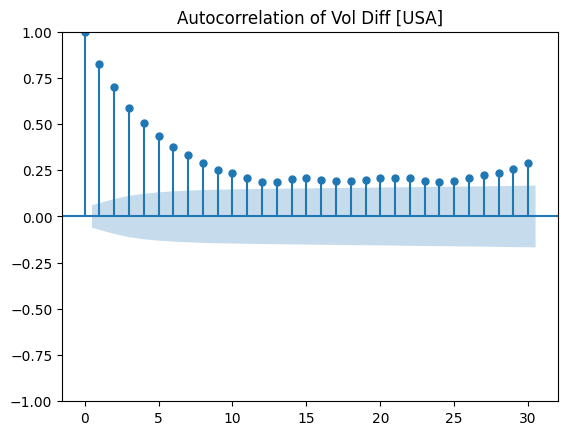

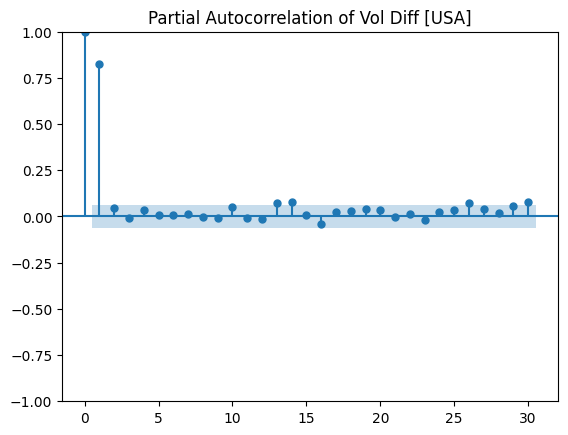

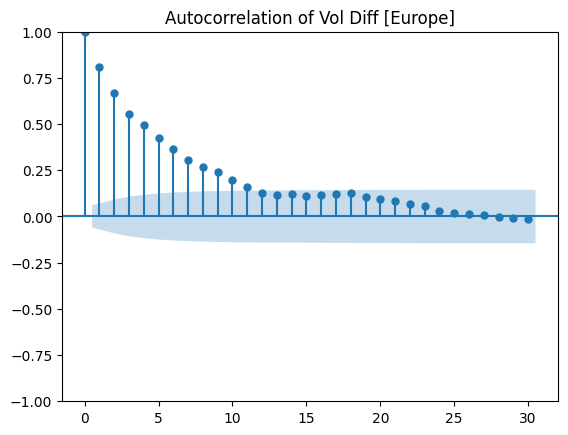

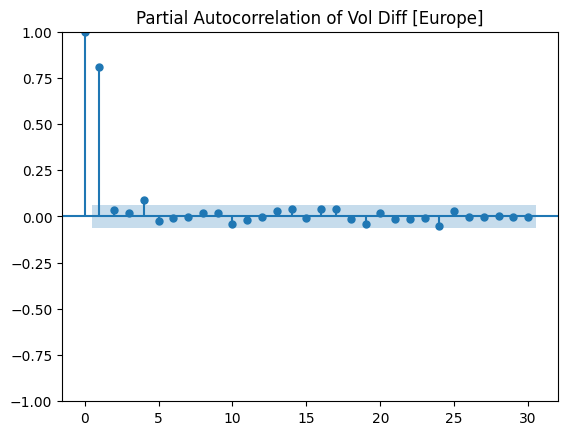

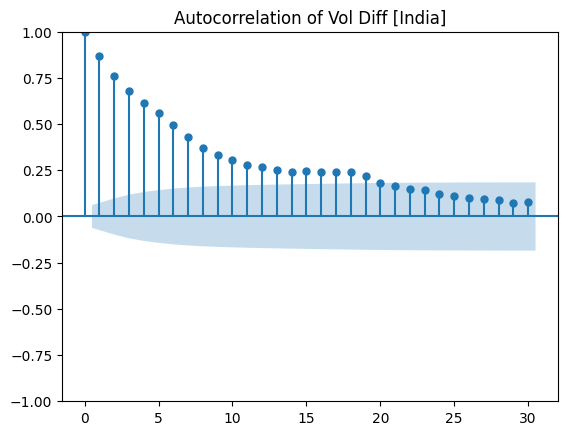

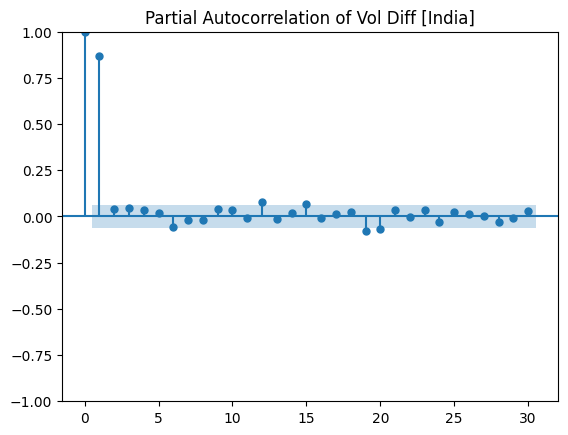

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_95_1['Vol Diff1'].dropna(), lags=30)
plt.title('Autocorrelation of Vol Diff [USA]')
plot_pacf(df_95_1['Vol Diff1'].dropna(), lags=30)
plt.title('Partial Autocorrelation of Vol Diff [USA]')

plot_acf(df_95_2['Vol Diff2'].dropna(), lags=30)
plt.title('Autocorrelation of Vol Diff [Europe]')
plot_pacf(df_95_2['Vol Diff2'].dropna(), lags=30)
plt.title('Partial Autocorrelation of Vol Diff [Europe]')

plot_acf(df_95_3['Vol Diff3'].dropna(), lags=30)
plt.title('Autocorrelation of Vol Diff [India]')
plot_pacf(df_95_3['Vol Diff3'].dropna(), lags=30)
plt.title('Partial Autocorrelation of Vol Diff [India]')

plt.show()

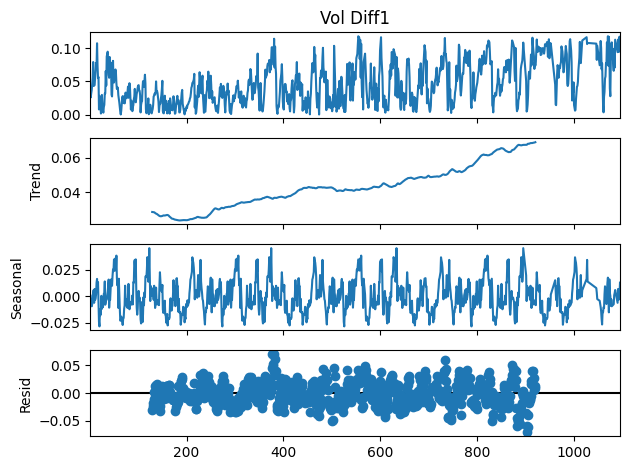

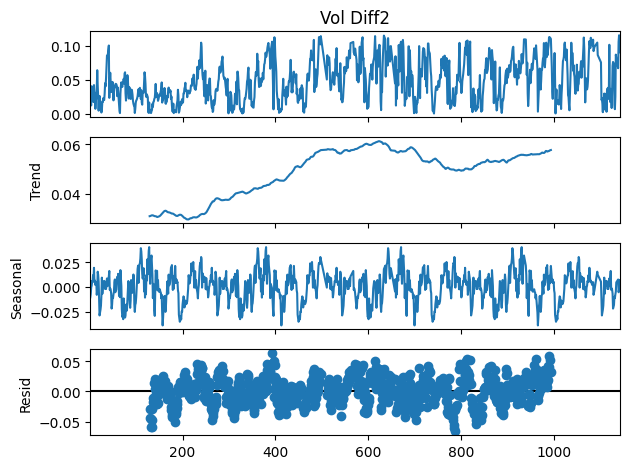

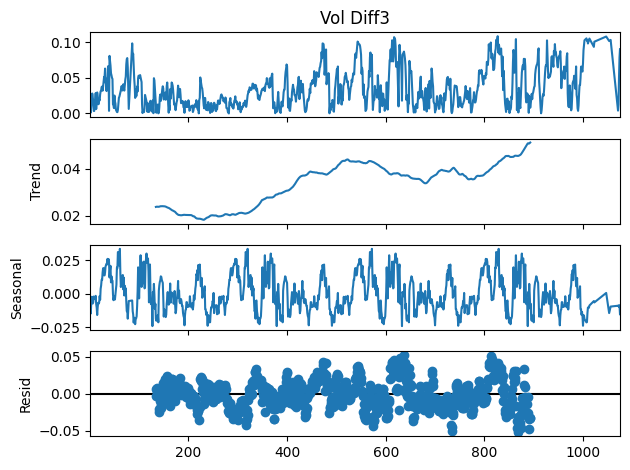

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(df_95_1['Vol Diff1'], model='additive', period=252)
decomposition1.plot()
plt.show()

decomposition2 = seasonal_decompose(df_95_2['Vol Diff2'], model='additive', period=252)
decomposition2.plot()
plt.show()

decomposition3 = seasonal_decompose(df_95_3['Vol Diff3'], model='additive', period=252)
decomposition3.plot()
plt.show()